# Machine Learning final project    
## Author : WeiChou, Wen & ChengTan, Kao

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# The dataset is 'Airline Delay' from ‘Kaggle’.
# Dataset Like : https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [ ]:
# Since this dataset too huge for running model, but we didn’t fine the better way to make it quicker, I used 
# Sample function to randomly chose 10 thousands data for our project. 

In [40]:

df= pd.read_csv('airlines_delay.csv')

In [41]:

df = df.sample(n=10000, random_state=0)

In [42]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
485079,2972.0,875.0,94.0,YV,LAS,SFO,5,1
392446,6260.0,1145.0,33.0,OO,DEN,COS,1,0
483622,687.0,961.0,165.0,UA,LGA,ORD,4,1
191823,827.0,655.0,140.0,WN,BNA,AUS,4,1
13421,2092.0,1082.0,157.0,DL,TPA,DTW,4,0


In [5]:
df.info(); df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 485079 to 475097
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Flight       10000 non-null  float64
 1   Time         10000 non-null  float64
 2   Length       10000 non-null  float64
 3   Airline      10000 non-null  object 
 4   AirportFrom  10000 non-null  object 
 5   AirportTo    10000 non-null  object 
 6   DayOfWeek    10000 non-null  int64  
 7   Class        10000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 703.1+ KB


,Flight,Time,Length,DayOfWeek,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2449.240700,802.248500,131.717200,3.936700,0.449000
std,2069.194691,275.443571,69.703596,1.915114,0.497417
min,1.000000,15.000000,25.000000,1.000000,0.000000
25%,728.000000,570.000000,81.000000,2.000000,0.000000
50%,1825.000000,800.000000,115.000000,4.000000,0.000000
75%,3798.000000,1030.000000,161.000000,5.000000,1.000000
max,7812.000000,1439.000000,620.000000,7.000000,1.000000


In [6]:
df.nunique()

Flight         4464
Time            929
Length          385
Airline          18
AirportFrom     267
AirportTo       267
DayOfWeek         7
Class             2
dtype: int64

In [7]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [8]:
df.corr()

,Flight,Time,Length,DayOfWeek,Class
Flight,1.000000,-0.007600,-0.344790,-0.013487,-0.053629
Time,-0.007600,1.000000,-0.014864,0.010620,0.151360
Length,-0.344790,-0.014864,1.000000,0.007296,0.047602
DayOfWeek,-0.013487,0.010620,0.007296,1.000000,-0.020659
Class,-0.053629,0.151360,0.047602,-0.020659,1.000000


In [9]:
df.shape

(10000, 8)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

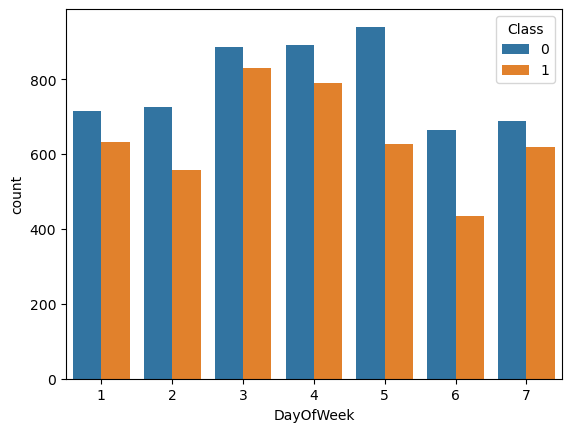

In [10]:
sns.countplot(x='DayOfWeek', hue='Class', data=df  )

<AxesSubplot:xlabel='Airline', ylabel='count'>

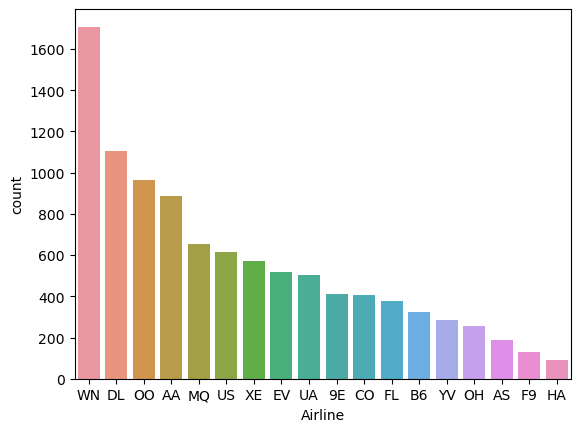

In [11]:
sort=df['Airline'].value_counts().sort_values(ascending=False)
sns.countplot(x='Airline', data=df ,order=sort.index )


## Setting  features

In [12]:
from sklearn.preprocessing import LabelEncoder


df['AirportFrom']=LabelEncoder().fit_transform(df['AirportFrom'])

df['AirportTo']=LabelEncoder().fit_transform(df['AirportTo'])

In [13]:
DayOfWeek=pd.DataFrame()
DayOfWeek=pd.get_dummies(df.DayOfWeek, prefix='DayOfWeek')

In [14]:
Airline=pd.DataFrame()
Airline=pd.get_dummies(df.Airline ,prefix='Airline')

## Preparing data

In [15]:
df=df.drop(columns=['DayOfWeek','Airline'])

In [16]:
Class=df.pop('Class')
df=pd.concat([df,Airline,DayOfWeek,Class] , axis=1)
df.head()

,Flight,Time,Length,AirportFrom,AirportTo,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,Airline_XE,Airline_YV,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Class
485079,2972.0,875.0,94.0,143,235,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
392446,6260.0,1145.0,33.0,71,57,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
483622,687.0,961.0,165.0,149,192,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
191823,827.0,655.0,140.0,27,14,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
13421,2092.0,1082.0,157.0,254,76,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# For preprocessing our data, we import data LabelEncoder to transform the column ‘AirportFrom’, and ‘AirportTo’ 
# which are object type to be numeric. And tried get_dummies at column ’Airline’ because it has only 18 unique not
# like the other two have 267 unique. 

## Split and Scaling data

In [17]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [ ]:
# split data by 30% for testing and scaling data. 
# In the model testing, we decided to access performance by f1_score and accuracy_score. 

## Knn

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30, metric='manhattan', p=1)
knn.fit(X_train, y_train)

# Predicting 
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_knn = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy:', accuracy_knn)

# F1 score
knn_f1_score=f1_score(y_test, y_pred)

print('f1_score:{}%'.format(knn_f1_score*100))

Confusion matrix:
  [[1297  329]
 [ 810  564]]
Accuracy: 0.6203333333333333
f1_score:49.757388619320686%


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':[5,10,15,20,30]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
 
grid_search.fit(X_train,y_train)
 
grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 30}, 0.62)

In [22]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
# Firstly, the KNN classifier. To try more, we use GridSearchCV to generate the best parameter and check what is going to be in our project. 
# KNN shows 0.6 accuracy and 49.7 at f1_score.

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression(C=1)
lr.fit(X_train, y_train) 

# Predicting 
y_pred = lr.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_lg = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy:', accuracy_lg)

# F1 score
lg_f1_score = f1_score(y_test, y_pred)

print('f1_score:{}%'.format(lg_f1_score*100))

Confusion matrix:
  [[1283  343]
 [ 768  606]]
Accuracy: 0.6296666666666667
f1_score:52.17391304347825%


In [ ]:
# Logistic Regression shows 0.63 accuracy and 52.17 f1_score.

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=15, criterion='gini', random_state = 0)
rf.fit(X_train, y_train) 

# Predicting 
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy_score:',accuracy_rf)

# F1 score
rf_f1_score=f1_score(y_test, y_pred)

print('f1_score:{}%'.format(rf_f1_score*100))

Confusion matrix:
  [[1320  306]
 [ 792  582]]
Accuracy_score: 0.634
f1_score:51.45888594164456%


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[30,50,80,120,200,300],'max_depth':[5,10,15,20,25,30,50]}
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=5, n_jobs=2)
 
grid_search.fit(X_train,y_train)
 
grid_search.best_params_,grid_search.best_score_


({'max_depth': 15, 'n_estimators': 50}, 0.6412857142857142)

In [25]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Random Forest model for classification, this time we got the lower score if use the recommended parameters, 
# so we did not put result of CV into our model. The Random Forest shows 0.634 accuracy and 51.46 f1_score.

## Naive-bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting 
y_pred = NB.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_NB = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy:', accuracy_NB)

# F1_score
NB_f1_score=f1_score(y_test, y_pred)

print('f1_score:{}%'.format(NB_f1_score*100))

Confusion matrix:
  [[865 761]
 [466 908]]
Accuracy: 0.591
f1_score:59.677949392047324%


In [27]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
# Then Naive bases model shows 0.591 accuracy and 59.67 f1_score.

## Svm

In [28]:
from sklearn.svm import SVC

svm = SVC( random_state = 0)
svm.fit(X_train, y_train)

# Predicting 
y_pred = svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy:', accuracy_svm)

# F1 score
svm_f1_score=f1_score(y_test, y_pred)

print('f1_score:{}%'.format(svm_f1_score*100))

Confusion matrix:
  [[1310  316]
 [ 815  559]]
Accuracy: 0.623
f1_score:49.710982658959544%


In [29]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# SVM took our much time, especially when we tried to put whole dataset for running. It shows 0.623 accuracy 
# and 49.71 f1_score.

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=20, criterion='entropy', min_samples_leaf=9,random_state = 0)
dt.fit(X_train, y_train) 

# Predicting 
y_pred = dt.predict(X_test)

# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy_dt = accuracy_score(y_test, y_pred)

print("Confusion matrix:\n ", cm)
print('Accuracy:', accuracy_dt)

# F1 score
dt_f1_score=f1_score(y_test, y_pred)

print('f1_score:{}%'.format(dt_f1_score*100))

Confusion matrix:
  [[1082  544]
 [ 705  669]]
Accuracy: 0.5836666666666667
f1_score:51.72013915732509%


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[5,10,15,20,12,30,50],'criterion':['gini','entropy'],'min_samples_leaf':[1,3,5,7,9]}
 
grid_search.fit(X_train,y_train)
 
grid_search.best_params_,grid_search.best_score_

({'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9}, 0.624)

In [32]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# Decision Tree classifier got only 37 f1_score when we set max_depth is 5, and we tried more to get 
# 51.72 f1_score and 0.58 accuracy.

## Results Comparing

In [36]:
models = pd.DataFrame({
    'Model': ['Random Forest', 
              'Knn', 
              'Naive-bayes', 
              'Decision Tree', 
              'Logistic Regression', 
              'SVC'
                ],
    'F1_Score': [rf_f1_score,
              knn_f1_score,
              NB_f1_score,
              dt_f1_score,
              lg_f1_score,
              svm_f1_score
              ],
      'Accuracy':[accuracy_rf,
                 accuracy_knn,
                 accuracy_NB,
                 accuracy_dt,
                 accuracy_lg,
                 accuracy_svm]})
models.sort_values(by='Accuracy', ascending=False)

,Model,F1_Score,Accuracy
0,Random Forest,0.514589,0.634000
4,Logistic Regression,0.521739,0.629667
5,SVC,0.497110,0.623000
1,Knn,0.497574,0.620333
2,Naive-bayes,0.596779,0.591000
3,Decision Tree,0.517201,0.583667


In [ ]:
# Here is the result of our evaluation score, we combined all at a data frame. 